# ЕГЭ 2017 Вариант 4 &nbsp; &nbsp; &nbsp; EGE 2017 Variant 4
[ЕГЭ-2017. Информатика.10 тренировочных вариантов. Ушаков Д.М.](https://drive.google.com/file/d/0B6696ckkWj_zS2ptblAxNERHZzQ/view)

[Basic Regular Expressions in R Cheatsheet](https://www.rstudio.com/wp-content/uploads/2016/09/RegExCheatsheet.pdf)

[DataFlair: R Tutorials](https://data-flair.training/blogs/category/r/)

[Алгоритм Шеннона — Фано](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%A8%D0%B5%D0%BD%D0%BD%D0%BE%D0%BD%D0%B0_%E2%80%94_%D0%A4%D0%B0%D0%BD%D0%BE)

[IPv4 - Address Classes](https://www.tutorialspoint.com/ipv4/ipv4_address_classes.htm)

[Basic and advanced network visualization with R](http://www.kateto.net/wp-content/uploads/2016/04/Sunbelt%202016%20R%20Network%20Visualization%20Handout.pdf)

In [6]:
library(IRdisplay)
library(repr)
library(hash)
library(numbers)
library(e1071)
library(igraph)
library(VennDiagram)

In [2]:
# install.packages("")

In [3]:
# sessionInfo()

In [4]:
answer_dictionary <- hash()

In [5]:
display_html("<style>
@import url('https://fonts.googleapis.com/css?family=Roboto&effect=3d|fire-animation|scuffed-steel|brick-sign');
body {background-color: aliceblue;} 
a {color: #4876ff; font-family: 'Roboto';} 
h1 {color: #348ABD; font-family: 'Roboto'; text-shadow: 4px 4px 4px #aaa;} 
h2, h3 {color: gray; font-family: 'Roboto'; text-shadow: 4px 4px 4px #aaa;}
h4 {color: #348ABD; font-family: 'Roboto';}
span {text-shadow: 4px 4px 4px #aaa;}
div.output_prompt, div.output_area pre, div.output_subarea {color: gray;}
div.input_prompt {color: #4876ff;}      
div.output_stderr pre {background-color: aliceblue;}  
div.output_stderr {background-color: gray;}                        
</style>")

## Часть 1 &nbsp; &nbsp; &nbsp; Part 1
## 1.
Сколько значащих нулей в двоичной записи числа $188_{10}$?

How many significant zeros in the binary number are $188_{10}$?

In [7]:
options(scipen = 999)
dec2bin <- function(n) {
  if (n == 0) {
      bv <- '0'
  } else {
      bv <- rep(0, 1 + floor(log(n, 2)))
      while (n >= 2) {
          pow <- floor(log(n, 2))
          bv[1 + pow] <- 1
          n <- n - 2^pow
      }
      bv[1] <- n %% 2
      paste(rev(bv), collapse = "")
  }
}

In [8]:
dec2bin(188)

[1] "10111100"

In [9]:
gsub("1","",dec2bin(188))

[1] "000"

In [10]:
nchar(gsub("1","",dec2bin(188)))

[1] 3

In [11]:
# 188 _10 = 10111100_2
1 * 2 ** 7 + 1 * 2 ** 5 + 1 * 2 ** 4 + 1 * 2 ** 3 + 1 * 2 ** 2

[1] 188

В составе числа $188_{10}$ 5 ненулевых коэффициентов различных степеней основания системы 2. 

Наибольшая степень - 7-ая, значит всего коэффициентов - 8.

Количество значащих нулей в двоичной записи $188_{10}$ равно 8 - 5 = 3.

---

In the composition of the number $188_{10}$ there are 5 nonzero coefficients of different degrees of the binary basis 2.

The highest degree is the 7th, which means there are 8 coefficients in the binary form of this number.

So the number of significant zeros in the $188_{10}$ binary record is 8 - 5 = 3.

In [12]:
answer_dictionary[1] <- nchar(gsub("1","",dec2bin(188)))

## 2.
Дан фрагмент таблицы истинности выражения F, зависящего от трёх аргументов X, Y, Z.

A fragment of the truth table of the expression F, depending on the three arguments X, Y, Z is given.


| X | Y | Z | F |
|-:|-:|-:|-:|
| 0 | 0 | 0 | 0 |
| 0 | 1 | 1 | 1 |
| 1 | 0 | 0 | 1 |

Перечислите в порядке возрастания без запятых и пробелов номера логических выражений, которые соответствуют F.

List in ascending order without commas and spaces the numbers of logical expressions that correspond to F.

$1) \ (X \lor \neg Y) \to Z \\    
2) \ (X \lor Y) \to \neg Z \\
3) \ X \lor (\neg Y \to Z) \\
4) \ X \lor Y \lor Z \\
5) \ X \lor Y \land \neg Z$

In [13]:
bc <- matrix(c(0,0,0, 0,1,1, 1,0,0), nrow=3, ncol=3, byrow = TRUE)
x_implies_y <- function(x,y) {!x | y}

F <- function(X, Y, Z, I) {
    if (I == 1) {return(x_implies_y((X | !Y), Z))}
    if (I == 2) {return(x_implies_y((X | Y), !Z))}
    if (I == 3) {return(X | x_implies_y(!Y, Z))}
    if (I == 4) {return(X | Y | Z)}    
    if (I == 5) {return(X | Y & !Z)}    
} 

In [14]:
for (i in 1:5){
    result = vector(length=3)
    for (j in 1:3) {result[j] = F(bc[j,1],bc[j,2],bc[j,3],i)}
    if (all(result == c(FALSE,TRUE,TRUE))){print(i)}
}

[1] 3
[1] 4


In [15]:
answer_dictionary[2] <- '34'

## 3.
Между четырьмя местными аэропортами `ЛЕСНОЙ`, `ЗИМА`, `КРАЙ` и `ПОЛЯНА`, ежедневно выполняются авиарейсы. 

Приведён фрагмент расписания перелётов между ними. 

Путешественник оказался в аэропорту `ЛЕСНОЙ` в полночь (0:00). 

Определите самое раннее время, когда он может попасть в аэропорт `ПОЛЯНА`.

| Аэропорт вылета | Аэропорт прилёта | Время вылета | Время прилёта |
|-|-|-|-|
| ПОЛЯНА | КРАЙ	| 06:20 | 08:35 |
| КРАЙ | ЛЕСНОЙ | 10:25 | 12:35 |
| ЛЕСНОЙ | КРАЙ	| 11:45	| 13:30 |
| ЗИМА | ПОЛЯНА | 12:15 | 14:25 |
| ПОЛЯНА | ЛЕСНОЙ | 12:45 | 16:35 |
| КРАЙ | ПОЛЯНА | 13:15 | 15:40 |
| ЛЕСНОЙ | ПОЛЯНА | 13:40 | 17:25 |
| ЛЕСНОЙ | ЗИМА | 15:30 | 17:15 |
| ПОЛЯНА | ЗИМА | 17:35 | 19:30 |
| ЗИМА | ЛЕСНОЙ | 19:40 | 21:55 |

Between the four local airports of `ЛЕСНОЙ`, `ЗИМА`, `КРАЙ` and `ПОЛЯНА`, daily flights are carried out. 

A fragment of the flight schedule between them is given. 

The traveler was at the airport `ЛЕСНОЙ` at midnight (0:00). 

Determine the earliest time when he can arrive to the airport `ПОЛЯНА`.

In [16]:
time_out <- c('06:20', '10:25', '11:45', '12:15', '12:45',
              '13:15', '13:40', '15:30', '17:35', '19:40')

time_in <- c('08:35', '12:35', '13:30', '14:25', '16:35',
             '15:40', '17:25', '17:15', '19:30', '21:55')

schedule <- data.frame(
    'Аэропорт вылета' = c('ПОЛЯНА', 'КРАЙ', 'ЛЕСНОЙ', 'ЗИМА', 'ПОЛЯНА',
                        'КРАЙ', 'ЛЕСНОЙ', 'ЛЕСНОЙ', 'ПОЛЯНА', 'ЗИМА'), 
    'Аэропорт прилета' = c('КРАЙ', 'ЛЕСНОЙ', 'КРАЙ', 'ПОЛЯНА', 'ЛЕСНОЙ',
                        'ПОЛЯНА', 'ПОЛЯНА', 'ЗИМА', 'ЗИМА', 'ЛЕСНОЙ'), 
    'Время вылета' = format(strptime(time_out, format='%H:%M'), '%H:%M'),
    'Время прилета' = format(strptime(time_in, format='%H:%M'), '%H:%M'))

schedule

Аэропорт.вылета,Аэропорт.прилета,Время.вылета,Время.прилета
ПОЛЯНА,КРАЙ,06:20,08:35
КРАЙ,ЛЕСНОЙ,10:25,12:35
ЛЕСНОЙ,КРАЙ,11:45,13:30
ЗИМА,ПОЛЯНА,12:15,14:25
ПОЛЯНА,ЛЕСНОЙ,12:45,16:35
КРАЙ,ПОЛЯНА,13:15,15:40
ЛЕСНОЙ,ПОЛЯНА,13:40,17:25
ЛЕСНОЙ,ЗИМА,15:30,17:15
ПОЛЯНА,ЗИМА,17:35,19:30
ЗИМА,ЛЕСНОЙ,19:40,21:55


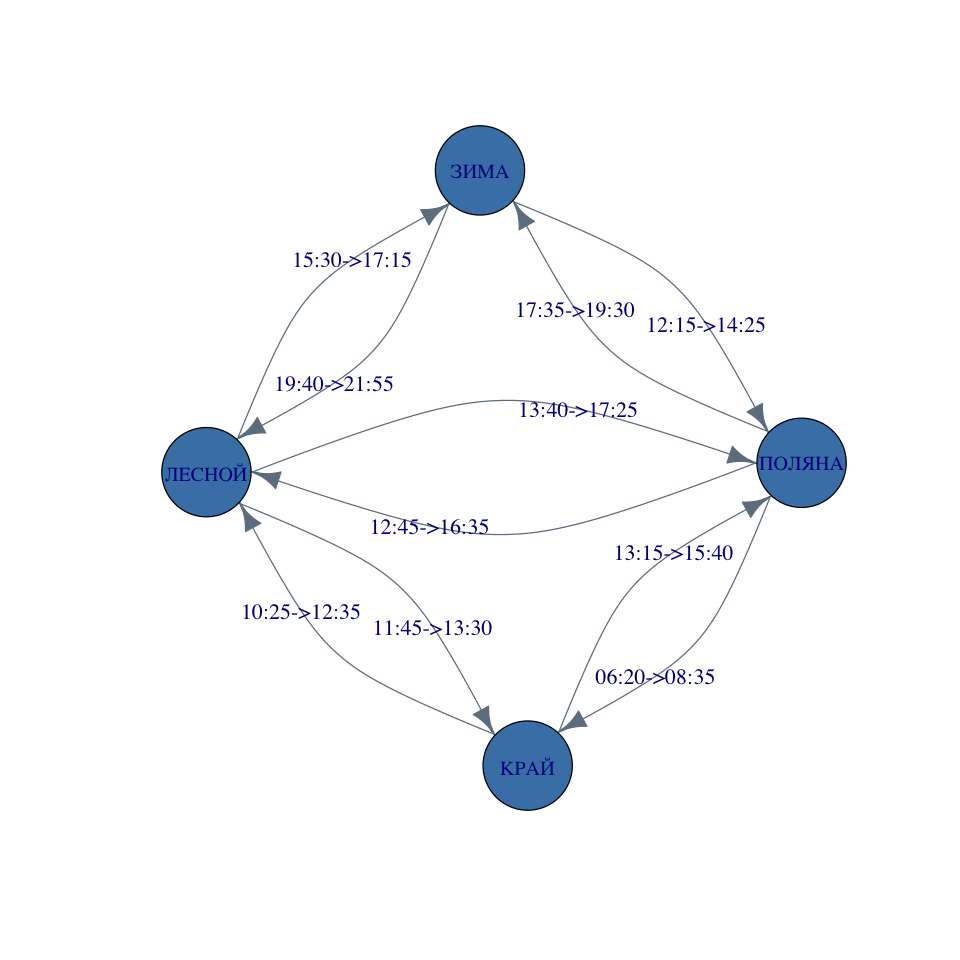

In [17]:
options(warn = -1,repr.plot.width=8,repr.plot.height=8)
edges <- data.frame(from=schedule[1],to=schedule[2])
t <- c(length=10)
for (i in 1:10) {
    t[i] <- paste(time_out[i],time_in[i],sep='->')
}

g <- graph_from_data_frame(edges, directed=TRUE)
plot(g,
     vertex.color="steelblue",vertex.size=30,
     edge.color="slategray",edge.label=t,
     edge.curved=0.4,edge.label.cex=1.1)

In [18]:
paths <- all_simple_paths(g,'ЛЕСНОЙ','ПОЛЯНА')
paths <- lapply(1:length(paths), function(x) as_ids(paths[[x]]))
paths

[[1]]
[1] "ЛЕСНОЙ" "ПОЛЯНА"

[[2]]
[1] "ЛЕСНОЙ" "КРАЙ"   "ПОЛЯНА"

[[3]]
[1] "ЛЕСНОЙ" "ЗИМА"   "ПОЛЯНА"

In [19]:
answer_dictionary[3] <-'17:25'

## 4.
Для групповых операций с файлами используются маски имён файлов. 

Маска представляет собой последовательность букв, цифр и прочих допустимых в именах файлов символов, в которой также могут встречаться следующие символы.

Символ `«?»` (вопросительный знак) означает ровно один произвольный символ.

Символ `«*»` (звёздочка) означает любую последовательность символов произвольной длины, в том числе `«*»` может задавать и пустую последовательность.

В каталоге находятся пять файлов:

`boom.pas`, `bloom.ppt`, `loom.pas`, `bottom.pdf`, `bom.pps`.

Ниже представлено восемь масок. 

`b*om.???`, `bo*.??*`, `*oo*m.*p??`, `?o*m.p?s`, `?oo*m.p*`, `*lo*.p*`, `*om.*`, `b*o*m.??*`


Сколько из них таких, которым соответствует ровно три файла из данного каталога?

---

For group operations with files, file name masks are used. 

A mask is a sequence of letters, numbers and other permissible characters in file names, in which the following symbols can also occur.

The symbol `"?"` (question mark) means exactly one arbitrary character.

The symbol `"*"` (asterisk) means any sequence of characters of arbitrary length, including the case when `"*"` can specify an empty sequence.

There are five files in the directory:

`boom.pas`, `bloom.ppt`, `loom.pas`, `bottom.pdf`, `bom.pps`.

Here are eight masks. 

`b*om.???`, `bo*.??*`, `*oo*m.*p??`, `?o*m.p?s`, `?oo*m.p*`, `*lo*.p*`, `*om.*`, `b*o*m.??*`

How many of them are those to which exactly three files from this catalog correspond?

In [20]:
file_list <- c('boom.pas', 'bloom.ppt', 'loom.pas', 
               'bottom.pdf', 'bom.pps')
mask_list <- c('b*om.???', 'bo*.??*', '*oo*m.*p??', '?o*m.p?s',
               '?oo*m.p*', '*lo*.p*', '*om.*', 'b*o*m.??*')

df <- data.frame(file_list=file_list,
                 mask_1=grepl("^b.*om\\....$", file_list), 
                 mask_2=grepl("^bo.*\\....*$", file_list), 
                 mask_3=grepl("^.*oo.*m\\..*p..$", file_list), 
                 mask_4=grepl("^.o.*m\\.p.s$", file_list),
                 mask_5=grepl("^.oo.*m\\.p.*$", file_list), 
                 mask_6=grepl("^.*lo.*\\.p.*$", file_list), 
                 mask_7=grepl("^.*om\\..*$", file_list), 
                 mask_8=grepl("^b.*o.*m\\....*$", file_list))
df 

file_list,mask_1,mask_2,mask_3,mask_4,mask_5,mask_6,mask_7,mask_8
boom.pas,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE
bloom.ppt,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE
loom.pas,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE
bottom.pdf,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE
bom.pps,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE


In [21]:
c <- 0
for (i in 2:9) {
    print(mask_list[i-1]); 
    print(length(df[1:5,i][df[1:5,i]==TRUE]))
    if (length(df[1:5,i][df[1:5,i]==TRUE]) == 3) {c <- c + 1}
}

c

[1] "b*om.???"
[1] 4
[1] "bo*.??*"
[1] 3
[1] "*oo*m.*p??"
[1] 3
[1] "?o*m.p?s"
[1] 3
[1] "?oo*m.p*"
[1] 2
[1] "*lo*.p*"
[1] 2
[1] "*om.*"
[1] 5
[1] "b*o*m.??*"
[1] 4


[1] 3

In [22]:
answer_dictionary[4] <- toString(c)

## 5.
Для кодирования некоторой последовательности, состоящей из букв А, Б, В, Г и Д, используется неравномерный двоичный код, 

позволяющий однозначно декодировать полученную двоичную последовательность. 

Вот этот код: `А-110`, `Б-0`, `В-111`, `Г-100`. 

Каким кодовым словом должна кодироваться буква Д? 

Если таких вариантов несколько, укажите самый короткий.

---

To encode a sequence consisting of the letters А, Б, В, Г and Д, an unequal binary code is used, 

which uniquely decodes the resulting binary sequence.

Here is the code: `А-110`, `Б-0`, `В-111`, `Г-100`.

What code word should be used for encoding the letter Д? 

If there are several such variants, specify the shortest one.

В решении использован Алгоритм Шеннона — Фано.

1) Самые короткие коды 0 и 1 не могут быть использованы: 0 уже является одним из кодовых слов, с 1 начинаются другие слова.

2) Следующая бинарная комбинация - из двух цифр. 

В начале кодовых слов уже есть сочетания 10 и 11. 

Сочетания 00 и 01 использовать нельзя: уже существует код, равный 0, и он не должен встречаться в начале других кодовых слов.

3) Трехзначные сочетания могут начинаться только с 1 и среди них уже есть 100, 110, 111. 

Остается только один вариант самого короткого кодирования: `Д - 101`.

---

The solution uses the Shannon-Fano Algorithm.

1) The shortest codes 0 and 1 can not be used: 0 is already one of the code words, with 1 other words begin.

2) The next binary combination is two-digit. 

At the beginning of the code words, there are already used combinations of 10 and 11. 

The combinations 00 and 01 cannot be used: there is one code equal to 0, and it should not occur at the beginning of other codewords.

3) Three-digit combinations can start only with 1 and there are already used 100, 110, 111 among them. 

The remaining variant for the shortest coding is only one: `Д - 101`.

In [23]:
answer_dictionary[5] <- '101'

## 6.
В некоторой информационной системе информация кодируется двоичными шестиразрядными словами. При передаче данных возможны их искажения, поэтому в конец каждого слова добавляется седьмой (контрольный) разряд таким образом, чтобы сумма разрядов нового слова, считая контрольный, была чётной. Например, к слову `101101` справа будет добавлен `0`, а к слову `010110` — `1`.

После приёма слова производится его обработка. При этом проверяется сумма его разрядов, включая контрольный. Если она нечётна, это означает, что при передаче этого слова произошёл сбой, и оно автоматически заменяется на зарезервированное слово `0000000`. Если она чётна, это означает, что сбоя не было или сбоёв было больше одного. В этом случае принятое слово не изменяется.

Приведём фрагмент кодовой таблицы, используемый в данной задаче:

---

In some information system, information is encoded in binary six-digit words. When transmitting data, their distortions are possible, so at the end of each word the seventh (control) symbol is added so that the sum of the bits of the new word, assuming the control digit, becomes even. For example, to the word `101101` on the right will be added `0`, and to the word `010110` - `1`.

After receiving the word, it is processed. This program checks the sum of code digits, including the control ones. If it is odd, it means that when this word was transmitted, it crashed and it is automatically replaced with the reserved word `0000000`. If it is even, it means that there was no malfunction or there were more than one malfunction. In this case, the received word does not change.

Here is the fragment of the code table used in this task:

| Буква | Кодовое слово | Примечание |
|-:|-:|-:|
| Letter | Code Word | Note |
| x | `000000` | сбой \ malfunction |
| A | `100001` | - |
| B | `011010` | - |
| C | `110010` | - |
| D | `110011` | - |

Исходное сообщение АВС было передано в виде:

`1000010 0110101 1100101`.

И затем было принято в виде:

`1100110 0110101 1100100`.

Как будет выглядеть принятое сообщение после обработки? 

В ответе запишите последовательность букв без пробелов и знаков препинания.

---

The original ABC message was sent as:

`1000010 0110101 1100101`

And then it was taken in the form:

`1100110 0110101 1100100`.

How will the received message look after processing? 

In the answer, write down a sequence of letters without spaces or punctuation.

In [24]:
string <- unlist(strsplit('1100110 0110101 1100100','[ ]'))
codes <- c('100001', '011010', '110010', '110011')
symbols <- c('A', 'B', 'C', 'D')
result <- ''

for (el in string) {
    if (nchar(gsub("0","",el)) %% 2 == 1) {
        result <- paste(result,'x',sep='')
    } else {
        for (i in 1:4){
            if (substr(el,1,6) == codes[i]) {
                result <- paste(result,symbols[i],sep='')
            }
        }
    }
}

result

[1] "DBx"

In [25]:
answer_dictionary[6] <- result

## 7.
<div style="width: 800px; height: 320px; overflow:auto;">
    <img src="it_images/2017_04_07.png" width="800" height="320"/>
</div>
Дан фрагмент электронной таблицы:

The fragment of the spreadsheet is given:

| | `A` | `B`| `C` | `D` |
|-:|-:|-:|-:|-:|
| 1 | 3 |   | 5 |   |
| 2 | `=(A1+C1)/4` | `=C1-1` | `=A2/2` | `=B1/2` |

Какое число должно быть записано в ячейке `B1`, 

чтобы построенная после выполнения вычислений диаграмма по значениям диапазона ячеек `A2:D2` соответствовала рисунку?


What number should be written in the cell `B1`, 

so that the constructed diagram after the calculation of the values in the range of cells `A2:D2` corresponds to the figure?

<div style="width: 500px; height: 450px; overflow:auto;">
    <img src="it_images/2017_04_07a.png" width="500" height="450"/>
</div>
[Google Sheet](https://drive.google.com/open?id=1TxgWmU-a_iQQOoPHSMSGv6Mdc_LSU1XPlkLMGHfdy7M)

`(A1 + C1) / 4 = (3 + 5) / 4 = 2`

`C1 - 1 = 5 - 1 = 4`

`A2 / 2 = 2 / 2 = 1`

`B1 / 2 = 1 ⟹ B1 = 2`

In [26]:
answer_dictionary[7] <- '2'

## 8.
Определите, что будет напечатано в результате выполнения следующего фрагмента программы.

<table style="width:95%;">
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">Python</th> 
    <th style="text-align:center;">R</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='python'>
s = 0

for k in range(3,9):
    s += k
    
print(s)
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='r'> 

s <- 0

for (k in 3:8) {
    s <- s + k
}

print(s)
    </code></pre></td>     
  </tr>    
</table>

Determine what will be printed as a result of the next program fragment.

In [27]:
s <- 0

for (k in 3:8) {
    s <- s + k
}

print(s)

[1] 33


In [28]:
answer_dictionary[8] <- toString(s)

## 9. 
Какова ширина (в пикселях) прямоугольного 64-цветного неупакованного растрового изображения, 

занимающего на диске 1,5 мегабайта, если его высота вдвое меньше ширины? 

В ответе запишите только целое число, единицу измерения писать не нужно.

---

What is the width (in pixels) of a rectangular 64-color unpacked image 

that occupies 1.5 megabytes on the disk, if its height is a half of the width? 

In the answer, write down only an integer, you do not need to write a unit of measurement.

In [29]:
bytes_for_image <- 1.5 * 2 ** 20
bits_for_image <- bytes_for_image * 2 ** 3
bits_for_one_pixel_64_colors <- log2(64)

image_size_in_pixel <- bits_for_image / bits_for_one_pixel_64_colors
# width * height = size; 1/2 * width ** 2 = size; width = (2 * size) ** 0.5
image_width_in_pixel <- (2 * image_size_in_pixel) ** 0.5
image_width_in_pixel

[1] 2048

In [30]:
answer_dictionary[9] <- toString(image_width_in_pixel)

## 10.
Вася и Петя передают друг другу сообщения, используя <i style="color:blue;">синий</i> и <i style="color:red;">красный</i> фонарики. 

Эти они делают, включая фонарики последовательно на одинаково короткое время в некоторой комбинации. 

Количество вспышек в одном сообщении — от 1 до 5. 

Сколько различных сообщений могут передавать мальчики?

---

Vasya and Petya relay messages to each other, using <i style="color:blue;">blue</i> and <i style="color:red;">red</i> flashlights. 

They do this, turning on lanterns consecutively for an equally short time in some combination. 

The number of flashes in one message is from 1 to 5. 

How many different messages can the boys transmit?

In [31]:
sum_of_binary_combinations <- 2 + 2 ** 2 + 2 ** 3 + 2 ** 4 + 2 ** 5
sum_of_binary_combinations

[1] 62

In [32]:
answer_dictionary[10] <- toString(sum_of_binary_combinations)

## 11.
Алгоритм вычисления значения функции `F(n)`, где `n` — натуральное число, задан следующими соотношениями:

`F(n) = F(n - 1) + F(n / 2)`, при `n > 1` и `n` кратно 2

`F(n) = F(n - 1) + 1`, при `n > 1` и `n` не кратно 2

`F(1) = 1`

Чему равно значение функции `F(8)`?

---

The algorithm for calculating the value of the function `F(n)`, where `n` is a natural number, is given by the following relations:

`F(n) = F(n - 1) + F(n / 2)`, for `n > 1` and `n` is a multiple of 2

`F(n) = F(n - 1) + 1`, for `n > 1` and `n` is not a multiple of 2

`F(1) = 1`

What is the value of the function `F(8)`?

In [33]:
F <- function(n) {
    if (n == 1){
        return (1)
    } else if (n > 1 & n %% 2 == 0) {
        return (F(n - 1) + F(n / 2))
    } else {
        return (F(n - 1) + 1)
    }
}

F(8)

[1] 15

In [34]:
answer_dictionary[11] <- toString(F(8))

## 12.
В терминологии сетей TCP/IP маской сети называется двоичное число, 

определяющее, какая часть IP-адреса узла сети относится к адресу сети, 

а какая — к адресу самого узла в этой сети. 

Обычно маска записывается по тем же правилам, что и IP-адрес. 

Адрес сети получается в результате применения поразрядной конъюнкции к заданному IP-адресу узла и маске.

По заданным IP-адресу узла и маске определите адрес сети.

IP-адрес узла: `209.135.205.15`

Маска: `255.255.248.0`

При записи ответа выберите из приведённых в таблице чисел четыре элемента IP-адреса 

и запишите в нужном порядке соответствующие им буквы. Точки `.` писать не нужно.

---

In the terminology of TCP / IP networks, a network mask is a binary number 

that specifies what part of the IP address of the network node refers to the network address, 

and which one to the host address in that network. 

Usually, the mask is written using the same rules as the IP address. 

The network address is obtained as a result of applying the bitwise conjunction to the specified IP address of the node and the mask.

From the given IP-address of the node and the mask, determine the network address.

The IP address is `209.135.205.15`

Mask: `255.255.248.0`

For recording an answer, select from the numbers in the table four IP address elements 

and write down the corresponding letters in the desired order. Points `.` do not need to be written.

| A | B | C | D | E | F | G | H |
| -:|-:|-:|-:|-:|-:|-:|-:|
| $ \ \ 0$ | $ \ 15$ | $135$ | $200$ | $205$ | $209$ | $248$ | $255$ |

*Пример*. Пусть искомый IP-адрес `192.168.128.0`, и дана таблица:

---

*Example*. The desired IP-address is 192.168.128.0, and the table is given:

| A | B | C | D | E | F | G | H |
| -:|-:|-:|-:|-:|-:|-:|-:|
| $128$ | $168$ | $255$ | $ \ \ 8$ | $127$ | $ \ \ 0$ | $ \ 17$ | $192$ |

В этом случае правильный ответ будет записан в виде: `HBAF`.

---

In this case, the correct answer will be written in the form: `HBAF`.

Переведем адрес узла и маску в бинарный вид.

Let's translate the address of the node and the mask into a binary form.

In [35]:
ip <- unlist(strsplit('209.135.205.15','[.]'))
mask <- unlist(strsplit('255.255.248.0','[.]'))

ip_bin <- ''
mask_bin <- '' 

for (i in 1:4) {
    ip_bin_cur <- dec2bin(as.integer(ip[i]))
    if (nchar(ip_bin_cur) < 8) {
        for (k in 1:(8 - nchar(ip_bin_cur))) {
           ip_bin_cur <- paste('0',ip_bin_cur,sep='') 
        }
    }

    mask_bin_cur <- dec2bin(as.integer(mask[i]))
    if (nchar(mask_bin_cur) < 8) {
        for (k in 1:(8 - nchar(mask_bin_cur))) {
           mask_bin_cur <- paste('0',mask_bin_cur,sep='') 
        }
    }
    
    ip_bin <- paste(ip_bin,ip_bin_cur,sep='.')
    mask_bin <- paste(mask_bin,mask_bin_cur,sep='.')

}

ip_bin <- substr(ip_bin,2,nchar(ip_bin))
mask_bin <- substr(mask_bin,2,nchar(mask_bin))

In [36]:
ip_bin

[1] "11010001.10000111.11001101.00001111"

In [37]:
mask_bin

[1] "11111111.11111111.11111000.00000000"

Теперь можно применить поразрядную коньюнкцию.

Now it is possible to apply bitwise conjunctions.

In [38]:
bin2dec <- function(n) {
  return(sapply(strsplit(as.character(n),split=""), 
                function(x) sum(as.numeric(x) * 2 ** (rev(seq_along(x) - 1)))))
}

In [39]:
ip_bin <- unlist(strsplit(ip_bin,''))
mask_bin <- unlist(strsplit(mask_bin,''))

net_bin <-''
for (i in 1:35){
    if (mask_bin[i] == '.'){
        net_bin <- paste(net_bin,'.',sep='')
    } else {
        symbol <- toString(as.integer(as.integer(mask_bin[i]) & as.integer(ip_bin[i])))
        net_bin <- paste(net_bin,symbol,sep='')
    }
}

net_bin

[1] "11010001.10000111.11001000.00000000"

In [40]:
net <- ''
for (el in unlist(strsplit(net_bin,'[.]'))) {
    net <- paste(net,toString(bin2dec(el)),sep='.')
}
net <- substr(net,2,nchar(net))

net

[1] "209.135.200.0"

При замене на буквенные обозначения получается:

When replacing address parts with the letters we get:

In [41]:
string <- unlist(strsplit(net,'[.]'))
codes <- c('0','15','135','200','205','209','248','255')
symbols <- c('A','B','C','D','E','F','G','H')
result <- ''

for (el in string) {
    for (i in 1:8) {
        if (el == codes[i]) {
            result <- paste(result,symbols[i],sep='')
        }
    }
}

result

[1] "FCDA"

In [42]:
answer_dictionary[12] <- result

## 13.
Для регистрации на сайте онлайн-магазина пользователю предлагается придумать пароль, состоящий из 6 символов. 

Правилами безопасности сайта разрешается использовать только символы латинского алфавита (строчные и прописные). 

При этом используется посимвольное кодирование и в памяти сервера для кодирования каждого символа используется 

**минимально возможное и одинаково целое** количество бит. 

А для хранения всего пароля используется **минимально возможное целое количество байт**. 

Какое количество информации (в байтах) требуется для хранения паролей 80 пользователей?

---

To register on the site of the online store, the user is asked to come up with a password consisting of 6 symbols. 

The site security rules allow only the Latin alphabet (lowercase and uppercase). 

In this case, symbol-by-symbol encoding is applied and in the server memory, 

**the minimum possible and equally integer number of bits** is used to encode each character. 

And to store the entire password, **the minimum possible integer number of bytes** is used. 

How much information (in bytes) is required to store passwords for 80 users?

1) $5 < \log_{2}{52} < 6$ => 6 (бит) - необходимо для кодирования одной из 52 строчных и прописных букв латинского алфавита.

Количество возможных вариантов кодировки ($2^6$) не должно быть меньше количества имеющейся информации ($52$ символов), 

округление в данном случае - всегда в большую сторону.

2) $6 * 6 = 36$ (бит) - необходимо для кодирования 6 символов пароля.

3) $36 \ / \ 8 = 4.5 \approx 5$ (байт) - необходимо для кодирования 6 символов пароля.

Количество байт - целое число, и округление опять должно быть только в большую сторону.

4) $80 * 5 = 400$ (байт) - необходимо для кодирования паролей 80 пользователей.

---

1) $5 < \log_{2}{52} <6$ => 6 (bits) - necessary for encoding one of the 52 lowercase and uppercase Latin letters.

The number of possible encoding options ($2 ^ 6$) should not be less than the amount of information available ($52$ symbols), 

rounding in this case - always in the larger side.

2) $6 * 6 = 36$ (bits) - necessary for encoding 6 password symbols.

3) $36 \ / \ 8 = 4.5 \approx 5$ (bytes) - necessary to encode 6 characters of the password.

The number of bytes is an integer, and rounding should only be in the larger side again.

4) $80 * 5 = 400$ (byte) - necessary to encode passwords of 80 users.

In [43]:
bits_for_one_symbol_from_52 <- ceiling(log2(52))
bits_for_6_symbol_from_52 <- 6 * bits_for_one_symbol_from_52
bytes_for_6_symbol_from_52 <- ceiling(bits_for_6_symbol_from_52 / 8)

bytes_for_80_passwords <- 80 * bytes_for_6_symbol_from_52
bytes_for_80_passwords 

[1] 400

In [44]:
answer_dictionary[13] <- toString(bytes_for_80_passwords)

## 14.
Система команд исполнителя РОБОТ, «живущего» в прямоугольном лабиринте на клетчатой плоскости включает 

4 команды-приказа и 4 команды проверки условия. 

The command system of the performer ROBOT, "living" in a rectangular labyrinth on a grid plane, 

includes 4 moving commands and 4 condition-checking ones. 

Команды-приказы: / Moving commands:

|<p style="text-align:center; color:red;">вверх</p>|<p style="text-align:center; color:green;">вниз</p>|<p style="text-align:center; color:red;">влево</p>|<p style="text-align:center; color:green;">вправо</p>|
|-:|-:|-:|-:|
|<p style="text-align:center; color:red;">up</p>|<p style="text-align:center; color:green;">down</p>|<p style="text-align:center; color:red;">left</p>|<p style="text-align:center; color:green;">right</p>|

При выполнении этих команд РОБОТ перемещается на одну клетку соответственно: вверх ↑, вниз ↓, влево ←, вправо →.

Если РОБОТ начнет движение в сторону находящейся рядом с ним стены, то он разрушится и программа прервётся.

Другие четыре команды проверяют истинность условия отсутствия стены у каждой стороны той клетки, где находится РОБОТ:

When these commands are executed, ROBOT moves one cell accordingly: up ↑, down ↓, left ←, right →.

If ROBOT starts moving towards the wall next to it, it is destroyed and the program is stopped.

The other four commands verify the truth of the absence of the wall on each side of the cell where ROBOT is located:

|<p style="text-align:center; color:red;">сверху свободно</p>|<p style="text-align:center; color:green;">снизу свободно</p>|<p style="text-align:center; color:red;">слева свободно</p>|<p style="text-align:center; color:green;">справа свободно</p>|
|-:|-:|-:|-:|
|<p style="text-align:center; color:red;">up free</p>|<p style="text-align:center; color:green;">down free</p>|<p style="text-align:center; color:red;">left free</p>|<p style="text-align:center; color:green;">right free</p>|

Цикл

`ПОКА` $<условие>$

- $последовательность \; команд$
    
`КОНЕЦ ПОКА`

выполняется, пока условие истинно.  

Если условие ложно, происходит переход к следующей команде.

В конструкции

`ЕСЛИ` $<условие> \; команда $

выполняется команда, если условие истинно. 

Если условие ложно, происходит переход к следующей команде.

Cycle

`WHILE` $<condition>$

- $sequence \; of \; commands$
    
`END WHILE`

executes until the condition is true. 

If the condition is false, the next command is executed.

In the construction

`IF` $<condition> \; command$

the command is executed if the condition is true. 

If the condition is false, the next command is executed.

---

Сколько клеток лабиринта соответствует требованию, что, начав движение в ней и выполнив предложенную программу, 

РОБОТ уцелеет и остановится в закрашенной клетке (клетка F6)?

How many cells of the labyrinth correspond to the requirement that, after starting the movement in it and executing the proposed program, 

ROBOT is survived and stops in the shaded cell (F6)?

`НАЧАЛО`

- `ПОКА` $<справа \; свободно>$ `ИЛИ` $<снизу \; свободно>$

  - `ЕСЛИ` $<справа \; свободно>$ вправо

  - вниз

- `КОНЕЦ ПОКА`

`КОНЕЦ`

---

`START`

- `WHILE` $<right \; free>$ `OR` $<down \; free>$

  - `IF` $<right \; free>$ right
  
  - down

- `END WHILE`  

`END`

In [45]:
# U+1F449, U+1F447, U+1F449, U+26D4

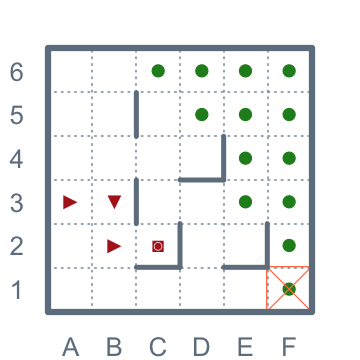

In [46]:
options(repr.plot.width=3,repr.plot.height=3)
par(mar=c(2,2,2,2))

plot(c(5.5,5.5,5.5,5.5,5.5,5.5,4.5,4.5,4.5,4.5,3.5,3.5,2.5),
     c(0.5,1.5,2.5,3.5,4.5,5.5,2.5,3.5,4.5,5.5,4.5,5.5,5.5),
     col='forestgreen',
     pch=20,cex=2,xaxt='n',yaxt='n',
     xlim=c(0.2,5.8),ylim=c(0.2,5.8))

axis(2,las=2,tck=0,col.axis='slategray',cex.axis=1.3,
     at=c(0.5,1.5,2.5,3.5,4.5,5.5),labels=c('1','2','3','4','5','6'))
axis(1,las=0,tck=0,col.axis='slategray',cex.axis=1.3,
     at=c(0.5,1.5,2.5,3.5,4.5,5.5),labels=c('A','B','C','D','E','F'))

points(5.5,0.5,pch=7,cex=5,col='coral')
points(c(0.5,1.5,1.5,2.5),c(2.5,2.5,1.5,1.5),
       pch=-c(9658, 9660, 9658, 9689),
       cex=1,col='firebrick')

seg <- c(2,2,2,3, 2,4,2,5, 2,1,3,1, 3,1,3,2,
         3,3,4,3, 4,3,4,4, 4,1,5,1, 5,1,5,2)

for (i in seq(from=1, to=32, by=4)) {
     segments(seg[i],seg[i+1],seg[i+2],seg[i+3],
              col='slategray',lw=4)
}

box(col="slategray",lwd=5)
grid(nx=6,ny=6,col="slategray",lty="dotted",equilogs = TRUE)

Траектории движения для всех случаев, когда робот уцелеет и остановится в закрашенной клетке:

The trajectories for the cases when the robot has survived and stopped in the painted cell:

1) `F6`;

2) `F5->F6`;

3) `F4->F5->F6`;

4) `F3->F4->F5->F6`;

5) `F2->F3->F4->F5->F6`;

6) `F1->F2->F3->F4->F5->F6`;

7) `E1->F1->F2->F3->F4->F5->F6`;

8) `D1->E1->F1->F2->F3->F4->F5->F6`;

9) `C1->D1->E1->F1->F2->F3->F4->F5->F6`;

10) `D2->E2->F2->F3->F4->F5->F6`;

11) `E2->F2->F3->F4->F5->F6`;

12) `E3->F3->F4->F5->F6`;

13) `E4->F4->F5->F6`.

In [47]:
answer_dictionary[14] <- '13'

## 15.
На рисунке — схема дорог, связывающих города $А, Б, В, Г, Д, Е, Ж, 3, И, К$. 

По каждой дороге можно двигаться только в одном направлении, указанном стрелкой. 

Сколько существует различных путей из города $А$ в город $К$?

---

In the figure - the scheme of roads is connecting the cities $А, Б, В, Г, Д, Е, Ж, 3, И, К$. 

For each road, it is possible to move only in one direction, indicated by an arrow. 

How many different paths exist from the city $А$ to the city $К$?

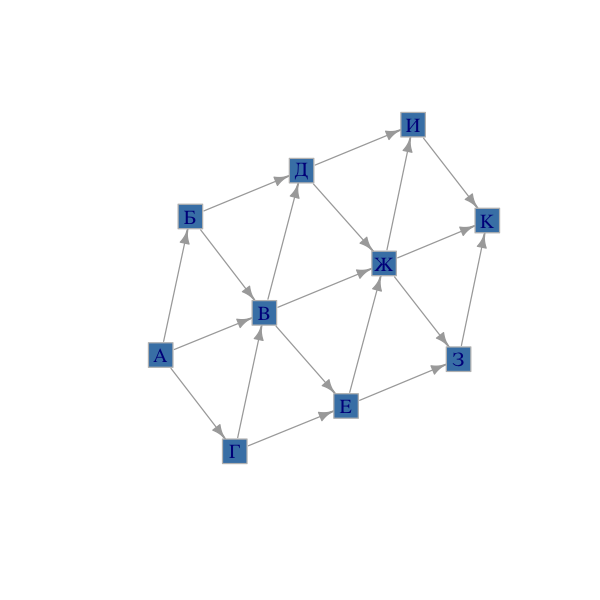

In [48]:
options(warn = -1,repr.plot.width=5,repr.plot.height=5)
edges <- c('А','Б', 'А','В', 'А','Г', 'Б','В', 'Б','Д',
           'В','Д', 'В','Е', 'В','Ж', 'Г','В', 'Г','Е',
           'Д','И', 'Д','Ж', 'Е','Ж', 'Е','З',
           'Ж','И', 'Ж','З', 'Ж','К', 'З','К', 'И','К')
g2 <- graph(edges)
plot(g2,
     vertex.color="steelblue",vertex.size=15,
     vertex.frame.color="gray",vertex.shape='square')

In [49]:
paths <- all_simple_paths(g2,'А','К')
paths <- lapply(1:length(paths), function(x) as_ids(paths[[x]]))
paths

[[1]]
[1] "А" "Б" "В" "Д" "Ж" "И" "К"

[[2]]
[1] "А" "Б" "В" "Д" "Ж" "З" "К"

[[3]]
[1] "А" "Б" "В" "Д" "Ж" "К"

[[4]]
[1] "А" "Б" "В" "Д" "И" "К"

[[5]]
[1] "А" "Б" "В" "Е" "Ж" "И" "К"

[[6]]
[1] "А" "Б" "В" "Е" "Ж" "З" "К"

[[7]]
[1] "А" "Б" "В" "Е" "Ж" "К"

[[8]]
[1] "А" "Б" "В" "Е" "З" "К"

[[9]]
[1] "А" "Б" "В" "Ж" "И" "К"

[[10]]
[1] "А" "Б" "В" "Ж" "З" "К"

[[11]]
[1] "А" "Б" "В" "Ж" "К"

[[12]]
[1] "А" "Б" "Д" "Ж" "И" "К"

[[13]]
[1] "А" "Б" "Д" "Ж" "З" "К"

[[14]]
[1] "А" "Б" "Д" "Ж" "К"

[[15]]
[1] "А" "Б" "Д" "И" "К"

[[16]]
[1] "А" "В" "Д" "Ж" "И" "К"

[[17]]
[1] "А" "В" "Д" "Ж" "З" "К"

[[18]]
[1] "А" "В" "Д" "Ж" "К"

[[19]]
[1] "А" "В" "Д" "И" "К"

[[20]]
[1] "А" "В" "Е" "Ж" "И" "К"

[[21]]
[1] "А" "В" "Е" "Ж" "З" "К"

[[22]]
[1] "А" "В" "Е" "Ж" "К"

[[23]]
[1] "А" "В" "Е" "З" "К"

[[24]]
[1] "А" "В" "Ж" "И" "К"

[[25]]
[1] "А" "В" "Ж" "З" "К"

[[26]]
[1] "А" "В" "Ж" "К"

[[27]]
[1] "А" "Г" "В" "Д" "Ж" "И" "К"

[[28]]
[1] "А" "Г" "В" "Д" "Ж" "З" "К"

[[29]]
[1] "А" "Г" "В" "Д" "Ж" "К"

[[30]]
[1] "А" "Г" "В" "Д" "И" "К"

[[31]]
[1] "А" "Г" "В" "Е" "Ж" "И" "К"

[[32]]
[1] "А" "Г" "В" "Е" "Ж" "З" "К"

[[33]]
[1] "А" "Г" "В" "Е" "Ж" "К"

[[34]]
[1] "А" "Г" "В" "Е" "З" "К"

[[35]]
[1] "А" "Г" "В" "Ж" "И" "К"

[[36]]
[1] "А" "Г" "В" "Ж" "З" "К"

[[37]]
[1] "А" "Г" "В" "Ж" "К"

[[38]]
[1] "А" "Г" "Е" "Ж" "И" "К"

[[39]]
[1] "А" "Г" "Е" "Ж" "З" "К"

[[40]]
[1] "А" "Г" "Е" "Ж" "К"

[[41]]
[1] "А" "Г" "Е" "З" "К"

In [50]:
answer_dictionary[15] <- toString(length(paths))

## 16.
Укажите через запятую в порядке возрастания все десятичные числа, не превосходящие 23, 

запись которых в двоичной системе счисления оканчивается на 101.

Indicate in descending order comma separated all decimal numbers not exceeding 23, 

the record of which in the binary system is ended with 101.

In [51]:
# 23 в бинарной системе счисления
# 23 from decimal to binary
dec2bin(23)

[1] "10111"

In [52]:
# возможные бинарные сочетания (<= 23) оканчивающиеся на 101: 101, 1101, 10101
# possible binary combinations (<= 23) ending with 101: 101, 1101, 10101
result <- c(bin2dec('101'), bin2dec('1101'), bin2dec('10101'))
result

[1]  5 13 21

In [53]:
answer_dictionary[16] <- toString(result)

## 17.
В языке запросов к поисковому серверу для обозначения 

- логической операции $«ИЛИ»$ используется символ $\mid$, 
- а для логической операции $«И»$ — $\&$. 

В таблице приведено количество страниц, которое находит поисковая система по каждому запросу.

- `Запрос` -> `Количество найденных страниц`

- `(Клавиатура | Мышь) & Джойстик` -> `11700`

- `Клавиатура & Джойстик` -> `7300`

- `Мышь & Джойстик` -> `5900`

Какое количество страниц будет найдено по запросу:  `Клавиатура & Мышь & Джойстик`?

Считается, что все запросы выполнялись практически одновременно, 

так что набор страниц, содержащих все искомые слова, не изменялся за время выполнения запросов.

---

In the query language to the search server, 

- the symbol $\mid$ is used to indicate the logical operation $"OR"$, 
- and for the logical operation $"AND"$ - $\&$. 

The table shows the number of pages that the search engine finds for each query.

- `Query` -> `Number of pages found`

- `(Keyboard | Mouse) & Joystick` -> `11700`

- `Keyboard & Joystick` -> `7300`

- `Mouse & Joystick` -> `5900`

How many pages will be found on:  `Keyboard & Mouse & Joystick`?

It is assumed that all queries were executed almost simultaneously 

so that the set of pages containing all the searched words did not change during the execution of queries.

`(Клавиатура | Мышь) & Джойстик` = `Клавиатура & Джойстик` | `Мышь & Джойстик`

`Клавиатура & Мышь & Джойстик` = `Клавиатура & Джойстик` + `Мышь & Джойстик` - (`Клавиатура & Джойстик` | `Мышь & Джойстик`)

---

`(Keyboard | Mouse) & Joystick` = `Keyboard & Joystick` | `Mouse & Joystick` 

`Keyboard & Mouse & Joystick` = `Keyboard & Joystick` + `Mouse & Joystick` - (`Keyboard & Joystick` | `Mouse & Joystick`)

In [54]:
Keyboard_and_Joystick <- 7300
Mouse_and_Joystick <- 5900
Keyboard_or_Mouse_and_Joystick <- 11700

Keyboard_and_Mouse_and_Joystick <- Keyboard_and_Joystick + 
Mouse_and_Joystick - Keyboard_or_Mouse_and_Joystick

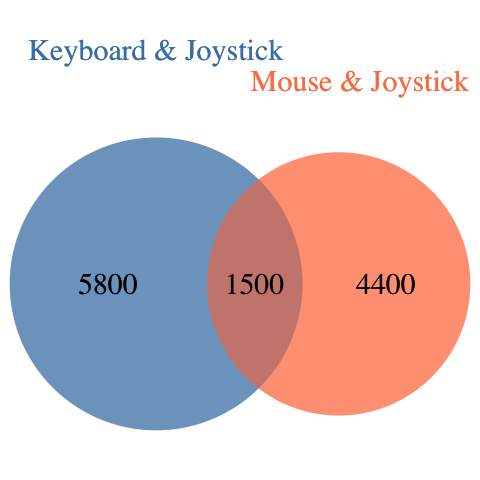

In [55]:
options(repr.plot.width=4,repr.plot.height=4)
venn.plot <- draw.pairwise.venn(
    area1 = Keyboard_and_Joystick, area2 = Mouse_and_Joystick, 
    cross.area = Keyboard_and_Mouse_and_Joystick,
    category = c("Keyboard & Joystick", "Mouse & Joystick"),
    fill = c("steelblue", "coral"),
    lty = "blank",
    cex = 1.5, cat.cex = 1.5, 
    cat.dist = c(0.12, 0.1), cat.pos = c(0, 6),
    cat.col = c("steelblue", "coral")
);
grid.draw(venn.plot);

In [56]:
answer_dictionary[17] <- toString(Keyboard_and_Mouse_and_Joystick)

## 18.
Какое наибольшее целое число удовлетворяет логическому условию: 

What is the largest integer that satisfies the logical condition:

$\neg ((X^2 < 100) \land (X \geq 6)) \land \neg (X \geq 15))$?

$\neg ((X^2 < 100) \land (X \geq 6)) \land \neg (X \geq 15)) \iff \\ 
\neg (6 \leq X < 10) \land \neg (X \geq 15) \iff \\
((X < 6) \lor (X \geq 10)) \land (X < 15) \iff \\
(X < 6) \lor (10 \leq X < 15)$

In [57]:
answer_dictionary[18] <- toString(14)

## 19.
В программе используется целочисленный массив `А` с индексами от `0` до `9`. 

Значения элементов массива равны $4; 5; 4; 7; 10; 8; 9; 11; 7; 8$ соответственно, т.е. $А[0] = 4; \; А[1] = 5$ и т.д.

Определите значение переменной `k` после выполнения следующего фрагмента программы, 

записанной ниже на разных языках программирования.

---

The program uses an integer array `A` with indices from `0` to `9`.

Values of array elements are equal to $4; 5; 4; 7; 10; 8; 9; 11; 7; 8$ respectively, i.e. $А[0] = 4; \; А[1] = 5$, etc.

Determine the value of the variable `k` after the execution of the next program fragment, 

recorded below in different programming languages.

<table style="width:95%;">
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">Python</th> 
    <th style="text-align:center;">R</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='python'>
A = [4,5,4,7,10,8,9,11,7,8]
k = 10

for i in range(9): 
    if (A[9-i] > A[8-i]):
        A[8-i] = A[9-i]
        k -= 1    
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='r'>
    
A <- c(4,5,4,7,10,8,9,11,7,8)
k <- 10

for (i in 0:8) { 
    if (A[10-i] > A[9-i]) {
        A[9-i] <- A[10-i]
        k <- k - 1
    }
}
    </code></pre></td>     
  </tr>    
</table>

In [58]:
A <- c(4,5,4,7,10,8,9,11,7,8)
k <- 10

for (i in 0:8) { 
    if (A[10-i] > A[9-i]) {
        A[9-i] <- A[10-i]
        k <- k - 1
    }
}

k

[1] 2

In [59]:
answer_dictionary[19] <- toString(k)

## 20.
Ниже на нескольких языках записан алгоритм. 

Получив на вход число х, этот алгоритм печатает два числа: L и М. 

Укажите наименьшее из таких чисел х, при вводе которых алгоритм печатает сначала 3, а потом 13.

---

Below, in several languages, an algorithm is written. 

Having received the number x on the input, this algorithm prints two numbers: L and M. 

Indicate the smallest number x, at using as an input of which the algorithm prints at first 3, and then 13.

<table style="width:95%;">
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">Python</th> 
    <th style="text-align:center;">R</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='python'>
    
x = int(input())
L, M = 10, 0

while x > 0:
    M = M + x % 10
    if x % 10 < L:
        L = x % 10 
    x = int(x / 10)
    
print(L, M)
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='r'>
    
x <- as.integer(readline())
L <- 10; M <- 0

while (x > 0){
    M <- M + x %% 10
    if (x %% 10 < L) {
        L <- x %% 10
    }
    x <- as.integer(x / 10)
}

print(paste(L, M, sep=" "))     
    </code></pre></td>     
  </tr>    
</table>

In [59]:
x <- as.integer(readline())
L <- 10; M <- 0

while (x > 0){
    M <- M + x %% 10
    if (x %% 10 < L) {
        L <- x %% 10
    }
    x <- as.integer(x / 10)
}

print(paste(L, M, sep=" "))  

337
[1] "3 13"


In [60]:
# расширенная версия программы
MIN <- 1000
for (x in 320:340) {  
    L <- 10; M <- 0
    t <- x
    
    while (x > 0){
        M <- M + x %% 10
        if (x %% 10 < L) {
            L <- x %% 10
        }
        if (L == 3 & M == 13 & MIN > t) {
            MIN <- t
        }
        x <- as.integer(x / 10)
    }    
    print(sprintf("%i %i %i", t, L, M))
}

[1] "320 0 5"
[1] "321 1 6"
[1] "322 2 7"
[1] "323 2 8"
[1] "324 2 9"
[1] "325 2 10"
[1] "326 2 11"
[1] "327 2 12"
[1] "328 2 13"
[1] "329 2 14"
[1] "330 0 6"
[1] "331 1 7"
[1] "332 2 8"
[1] "333 3 9"
[1] "334 3 10"
[1] "335 3 11"
[1] "336 3 12"
[1] "337 3 13"
[1] "338 3 14"
[1] "339 3 15"
[1] "340 0 7"


In [61]:
answer_dictionary[20] <- toString(MIN)

## 21.
Определите, при каком наибольшем значении $b$ в результате выполнения следующего алгоритма будет напечатано число 50 

(для Вашего удобства алгоритм представлен на нескольких языках).

---

Determine with what the largest value of the input $b$ as a result of the following algorithm will be printed the number 50 

(for your convenience, the algorithm is presented in several languages).

<table style="width:95%;">
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">Python</th> 
    <th style="text-align:center;">R</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='python'>
    
def F(x):
    if x % 10 < 5: 
        return 1
    else: 
        return 0
    
b = int(input())
a, k = 100, 0

for t in range(a,b+1):
    k += F(t)

print(k)
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='r'>
    
F <- function(x) {
    if (x %% 10 < 5) {
        return (1)
    } else {
        return (0)
    }
}    

a <- 100; k <- 0
b <- as.integer(readline())

for (t in a:b){
    k <- k + F(t)
}

print(k)     
    </code></pre></td>     
  </tr>    
</table>

In [62]:
F <- function(x) {
    if (x %% 10 < 5) {
        return (1)
    } else {
        return (0)
    }
}    

a <- 100; k <- 0
b <- as.integer(readline())

for (t in a:b){
    k <- k + F(t)
}

print(k)

199
[1] 50


Алгоритм вычисляет количество натуральных чисел `x` 

- с последней цифрой, равной `0,1,2,3,4`, 
- и находящихся в интервале $100 \leq  x \leq b$ для разных значений параметра $b$. 

При анализе натурального ряда легко видеть, что на каждый десяток приходится `5` таких чисел, 

следовательно для $b=50$ программе нужно последовательно оценить `50 * 2 = 100` натуральных чисел, 

причем подсчет начинается со `100` и первые `99` - игнорируются: 

$99 + 2 * 50 = 199$.

---

The algorithm calculates the number of natural `x` 

- with the last digit equal to `0,1,2,3,4`, 
- and they are in the interval $100 \leq x \leq b$ for different values of the parameter $b$. 

During analyzing the natural numbers, it is easy to see that for each ten of them there are `5` such numbers, 

hence for $b = 50$ the program needs to consistently evaluate `50 * 2 = 100` natural numbers, 

with the calculation starting at `100` and the first `99` - being ignored: 

$99 + 2 * 50 = 199$.

In [62]:
# расширенная версия программы
F <- function(x) {
    if (x %% 10 < 5) {
        return (1)
    } else {
        return (0)
    }
}   

A <- matrix(nrow=2, ncol=201-99)

for (b in 100:201) {
    a <- 100; k <- 0
    
    for (t in a:b){
        k <- k + F(t)
    }
    
    A[1,b-99] <- b
    A[2,b-99] <- k
}

print("Pairs [b,k]:")
print(A)

[1] "Pairs [b,k]:"
     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]  100  101  102  103  104  105  106  107  108   109   110   111   112   113
[2,]    1    2    3    4    5    5    5    5    5     5     6     7     8     9
     [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24] [,25] [,26]
[1,]   114   115   116   117   118   119   120   121   122   123   124   125
[2,]    10    10    10    10    10    10    11    12    13    14    15    15
     [,27] [,28] [,29] [,30] [,31] [,32] [,33] [,34] [,35] [,36] [,37] [,38]
[1,]   126   127   128   129   130   131   132   133   134   135   136   137
[2,]    15    15    15    15    16    17    18    19    20    20    20    20
     [,39] [,40] [,41] [,42] [,43] [,44] [,45] [,46] [,47] [,48] [,49] [,50]
[1,]   138   139   140   141   142   143   144   145   146   147   148   149
[2,]    20    20    21    22    23    24    25    25    25    25    25    25
     [,51] [,52] [,53] [,54] [,55] [,56] [,57] [

In [63]:
answer_dictionary[21] <- '199'

## 22.
У исполнителя `Удвоитель` две команды, которым присвоены номера:

1. `прибавь 3`,

2. `умножь на 2`.

Первая из них увеличивает число на экране на 3, вторая удваивает его. 

Программа для `Удвоителя` — это последовательность команд.

Сколько есть программ, которые число 2 преобразуют в число 26?

---

The performer `Doubler` can execute two commands, which are assigned the numbers:

1. `add 3`,

2. `multiply by 2`.

The first of them increases the number on the screen by 3, the second doubles it. 

The program for `Doubler` is a sequence of commands.

How many programs are there that the number 2 is converted to the number 26?

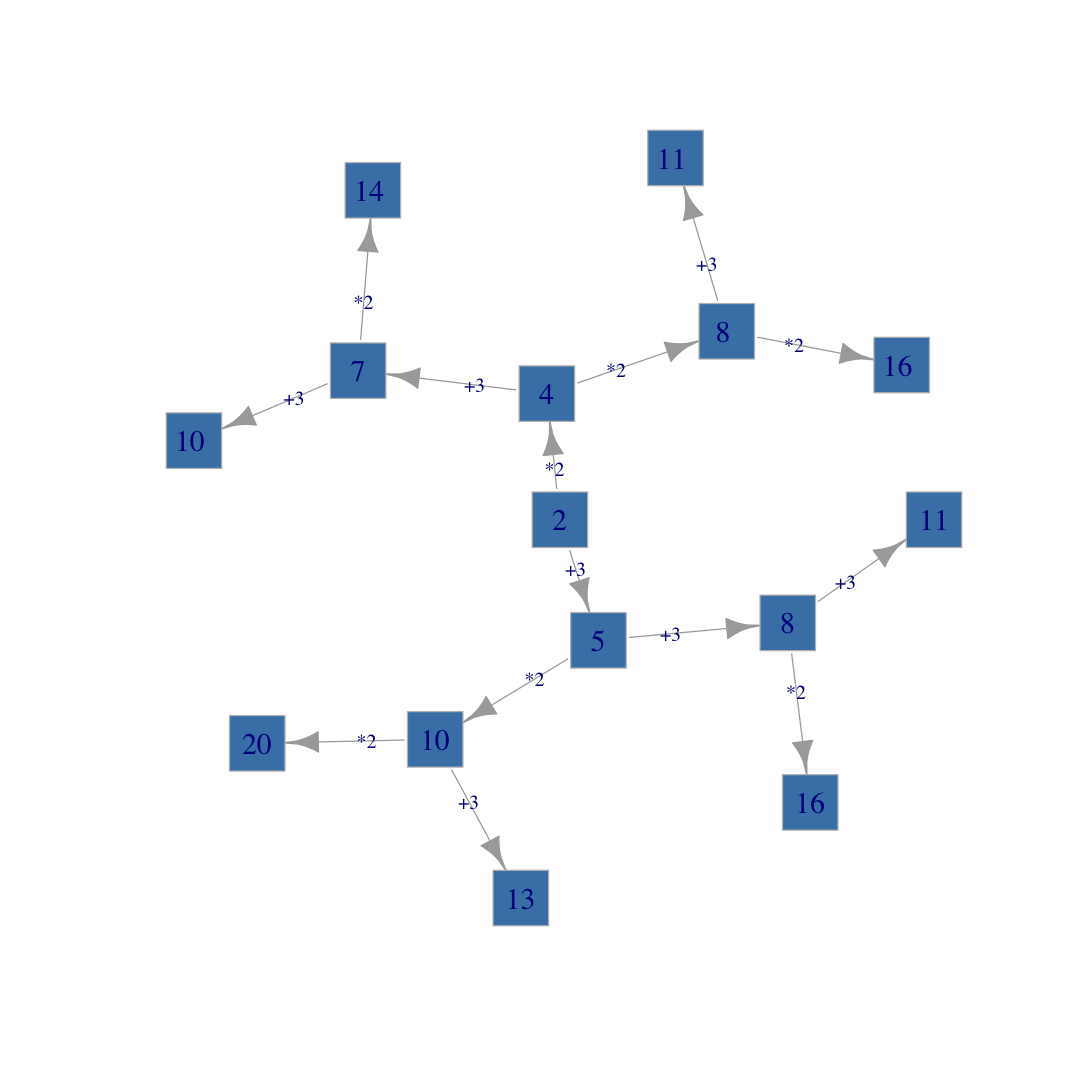

In [65]:
options(repr.plot.width=9,repr.plot.height=9)
edges1 <- c('2','5', '2','4', '5','8', '5','10', '4','7', '4','8 ',
            '8','11', '8','16', '10','13', '10','20', 
            '7','10 ', '7','14 ', '8 ','11 ', '8 ','16 ')

elabels <- c('+3','*2', '+3','*2', '+3','*2', '+3','*2',
             '+3','*2', '+3','*2', '+3','*2', '+3','*2')

g1 <- graph(edges1)

plot(g1,layout=layout_as_tree(g1,circular=TRUE),
     edge.label=elabels,vertex.color="steelblue",
     vertex.size=15,vertex.label.cex=1.5,
     vertex.frame.color="gray",vertex.shape='square')

| Последовательность чисел / A sequence of numbers | Программа / Program |
|:--|:--|
| 2,5,8,11,14,17,20,23,26 | `11111111` |
| 2,5,10,20,23,26 | `12211` |
| 2,5,10,13,26 | `1212` |
| 2,4,7,14,17,20,23,26 | `2121111` |
| 2,4,8,11,14,17,20,23,26 | `22111111` |
| 2,4,7,10,20,23,26 | `211211` |
| 2,4,7,10,13,26 | `21112` |

Последовательность команд максимальной длины, при которой из числа 12 можно получить число 26 состоит из 8 шагов:

- числа 2,5,8,11,14,17,20,23,26;
- команды 1,1,1,1,1,1,1,1.

Применив все возможные варианты программ не более, чем из 8 шагов, 

возможно подсчитать, сколько последовательностей содержит 26, если начать с 2.

---

A sequence of commands with a maximum length for the moving from the number 2 to the number 26 consists of 8 steps:

- numbers 2,5,8,11,14,17,20,23,26;
- commands 1,1,1,1,1,1,1,1.

Applying all possible variants of programs that consists of not more than 8 steps, 

it is possible to calculate how many sequences contains 26, if the performer starts with 2.

In [68]:
x <- c(2)

for (i in 0:7) {    
    n <- as.integer(length(x) - 2 ** i + 1)
    print(n)
    y <- c(); z <- c()
    
    for (j in n:length(x)) {
        y <- c(y, x[j] + 3) 
        z <- c(z, x[j] * 2)
    }
    
    x <- c(x, y, z)
}

length(x)

[1] 1
[1] 2
[1] 4
[1] 8
[1] 16
[1] 32
[1] 64
[1] 128


[1] 511

In [69]:
nt <- table(x)
nt[1:52]

x
 2  4  5  7  8 10 11 13 14 16 17 19 20 22 23 25 26 28 29 31 32 34 35 37 38 40 
 1  1  1  1  2  2  2  2  3  4  3  4  5  6  5  6  7  8  5  7  8  8  7  6  9  9 
41 43 44 46 47 49 50 52 53 55 56 58 59 61 62 64 65 67 68 70 71 73 74 76 77 79 
 7  6 11  8  7  5  9  8  6  5  9  7  5  4  8  8  4  5  7  8  4  5  5  9  1  5 

In [70]:
answer_dictionary[22] <- toString(nt[names(nt) == 26])

## 23.
Сколько существует различных наборов значений логических переменных $x_1, х_2, ... х_9, x_{10}$, 

которые удовлетворяют всем перечисленным ниже условиям? 

В ответе не нужно перечислять все различные наборы значений $x_1, х_2, ... х_9, x_{10}$, 

при которых выполнена данная система равенств. 

В качестве ответа вам нужно указать количество таких наборов.

---

How many different sets of values of logical variables $x_1, х_2, ... х_9, x_{10}$ exist 

that satisfy all the conditions listed below?

In the answer it is not necessary to list all the different sets of values $x_1, х_2, ... х_9, x_{10}$ 

for which the given system of equations is satisfied. 

As an answer, you need to specify only the number of such sets.

- $( x_1 \lor \neg x_2) \land (x_3 \lor \neg x_4) = 0$  **(1)**
- $( x_3 \lor \neg x_4) \land (x_5 \lor \neg x_6) = 0$  **(2)**
- $( x_5 \lor \neg x_6) \land (x_7 \lor \neg x_8) = 0$  **(3)**
- $( x_7 \lor \neg x_8) \land (x_9 \lor \neg x_{10}) = 0$  **(4)**

$\begin{cases}
( x_1 \lor \neg x_2) \land (x_3 \lor \neg x_4) = 0 \\
( x_3 \lor \neg x_4) \land (x_5 \lor \neg x_6) = 0 \\
( x_5 \lor \neg x_6) \land (x_7 \lor \neg x_8) = 0 \\
( x_7 \lor \neg x_8) \land (x_9 \lor \neg x_{10}) = 0 \\
\end{cases} \iff$

$\iff \begin{cases}
(x_1 \lor \neg x_2 = 0) \lor (x_3 \lor \neg x_4 = 0)\\
(x_3 \lor \neg x_4 = 0) \lor (x_5 \lor \neg x_6 = 0)\\
(x_5 \lor \neg x_6 = 0) \lor (x_7 \lor \neg x_8 = 0)\\
(x_7 \lor \neg x_8 = 0) \lor (x_9 \lor \neg x_{10} = 0)\\
\end{cases} \iff$

$\iff \begin{cases}
(\neg x_1 \land x_2 = 1) \lor (\neg x_3 \land x_4 = 1)\\
(\neg x_3 \land x_4 = 1) \lor (\neg x_5 \land x_6 = 1)\\
(\neg x_5 \land x_6 = 1) \lor (\neg x_7 \land x_8 = 1)\\
(\neg x_7 \land x_8 = 1) \lor (\neg x_9 \land x_{10} = 1)\\
\end{cases} \iff$

$\iff \begin{cases}
(x_1 = 0 \land x_2 = 1) \lor (x_3 = 0 \land x_4 = 1) \ (1*)\\
(x_3 = 0 \land x_4 = 1) \lor (x_5 = 0 \land x_6 = 1) \ (2*)\\
(x_5 = 0 \land x_6 = 1) \lor (x_7 = 0 \land x_8 = 1) \ (3*)\\
(x_7 = 0 \land x_8 = 1) \lor (x_9 = 0 \land x_{10} = 1) \ (4*)\\
\end{cases}$

1) 

Тождество $(1*)$ выполнется только для 7 наборов переменных $(x_1,x_2,x_3,x_4)$ из 16 возможных: 

The identity $(1*)$ is satisfied only for 7 sets of variables $(x_1,x_2,x_3,x_4)$ from 16 possible ones: 

(0,1,0,1), (0,0,0,1), (1,0,0,1), (1,1,0,1), (0,1,0,0), (0,1,1,0), (0,1,1,1).


2) 

Эти наборы $(x_1,x_2,x_3,x_4)$ должны пересекаться со множеством решений тождества $(2*)$ для переменных $(x_3,x_4,x_5,x_6)$.

Четыре варианта из пункта 1) с $(x_3,x_4)$ = (0,1) являются решением для $(2*)$ при любых значениях $(x_5,x_6)$. 

Получается `4 * 4 = 16` возможных сочетаний $(x_1,x_2,x_3,x_4,x_5,x_6)$. 

Три варианта из пункта 1) с $(x_3,x_4)$ = (0,0),(1,1),(1,0) не нарушают $(2*)$ только в случае: $(x_5,x_6)$ = (0,1). 

Всего тождествам $(1*)$ и $(2*)$ соответствуют `16 + 3 = 19` наборов переменных $(x_1,x_2,x_3,x_4,x_5,x_6)$. 

These sets $(x_1,x_2,x_3,x_4)$ must intersect the set of solutions for the identity $(2*)$ with the variables $(x_3,x_4,x_5,x_6)$. 

Four variants from point 1) with $(x_3,x_4)$ = (0,1) are solutions of $(2*)$ for any values of $(x_5,x_6)$. 

It turns out `4 * 4 = 16` possible combinations $(x_1,x_2,x_3,x_4,x_5,x_6)$. 

Three variants from point 1) with $(x_3,x_4)$ = (0,0),(1,1),(1,0) do not violate $(2*)$ only in the case: $(x_5,x_6)$ = (0,1). 

In total, identities $(1*)$ and $(2*)$ correspond to `16 + 3 = 19` sets of variables $(x_1,x_2,x_3,x_4,x_5,x_6)$.


3) 

Наборы $(x_1,x_2,x_3,x_4,x_5,x_6)$ должны пересекаться со множеством решений тождества $(3*)$ для переменных $(x_5,x_6,x_7,x_8)$. 

7 вариантов из пункта 2) с $(x_5,x_6)$ = (0,1) являются решением для $(3*)$ при любых значениях $(x_7,x_8)$. 

Получается `7 * 4 = 28` возможных сочетаний $(x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8)$. 

Остальные `19 - 7 = 12` вариантов из пункта 2) с $(x_5,x_6)$ = (0,0),(1,1),(1,0) не нарушают $(3*)$ только в случае: $(x_7,x_8)$ = (0,1). 

Всего тождествам $(1*)$, $(2*)$ и $(3*)$ соответствуют `28 + 12 = 40 наборов` переменных $(x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8)$.

Sets $(x_1,x_2,x_3,x_4,x_5,x_6)$ must intersect the set of solutions of the identity $(3*)$ for the variables $(x_5,x_6,x_7,x_8)$. 

7 variants from point 2) with $(x_5,x_6)$ = (0,1) are solutions of $(3*)$ for any values of $(x_7,x_8)$. 

It turns out `7 * 4 = 28` possible combinations $(x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8)$. 

`19 - 7 = 12` variants from point 2) with $(x_5,x_6)$ = (0,0),(1,1),(1,0) do not violate $(3*)$ only in the case: $(x_7,x_8)$ = (0,1). 

In total, identities $(1*)$, $(2*)$ and $(3*)$ correspond to `28 + 12 = 40` sets of variables $(x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8)$.

4) 

Наборы $(x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8)$ должны пересекаться со множеством решений тождества $(4*)$ для переменных $(x_7,x_8,x_9,x_{10})$. 

19 вариантов из пункта 3) с $(x_7,x_8)$ = (0,1) являются решением для $(4*)$ при любых значениях $(x_9,x_{10})$. 

Получается `19 * 4 = 76` возможных сочетаний $(x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_{10})$. 

`40 - 19 = 21` вариант из пункта 3) с $(x_7,x_8)$ = (0,0),(1,1),(1,0) не нарушает $(4*)$ только в случае: $(x_9,x_{10})$ = (0,1). 

Всего тождествам $(1*)$, $(2*)$, $(3*)$ и $(4*)$ соответствуют `76 + 21 = 97` наборов переменных $(x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_{10})$.

Sets $(x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8)$ must intersect the set of solutions of the identity $(4*)$ or the variables $(x_7,x_8,x_9,x_{10})$. 

19 variants from point 3) with $(x_7,x_8)$ = (0,1) are solutions of $(4*)$ for any values of $(x_9,x_{10})$. 

It turns out `19 * 4 = 76` possible combinations $(x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_{10})$. 

`40 - 19 = 21` variants from point 3) with $(x_7,x_8)$ = (0,0),(1,1),(1,0) do not violate $(4*)$ only in the case: $(x_9,x_{10})$ = (0,1). 

In total, identities $(1*)$, $(2*)$, $(3*)$ and $(4*)$ correspond to `76 + 21 = 97` sets of variables $(x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_{10})$.

In [72]:
# check the decision method
bc <- bincombinations(10)
c <- 0
n <- length(bc)/10

logical_function <- function(k,l,m,n) {
    (k | !l) & (m | !n)
}

for (i in 1:n){
    el <- bc[i,]
    e1 <- logical_function(el[1],el[2],el[3],el[4])
    e2 <- logical_function(el[3],el[4],el[5],el[6])
    e3 <- logical_function(el[5],el[6],el[7],el[8])
    e4 <- logical_function(el[7],el[8],el[9],el[10])
    
    result <- (e1 == 0) & (e2 == 0) & (e3 == 0) & (e4 == 0)
    if (result == 1) {
        c <- c + 1
    }
}
c

[1] 97

In [73]:
answer_dictionary[23] <- toString(c)

## Часть 2 &nbsp; &nbsp; &nbsp;​ Part 2
## 24.
Требовалось написать программу, при выполнении которой с клавиатуры считывается координата точки на прямой (х — действительное число) 

и определяется принадлежность этой точки одному из выделенных отрезков В и D (включая границы). 

Программист торопился и написал программу неправильно.

Последовательно выполните следующее:

$1.$ Перерисуйте и заполните таблицу, которая показывает, как работает программа 

при аргументах, принадлежащих различным областям (A, B, C, D и E). 

Границы (точки -2, 1, 4 и 7) принадлежат заштрихованным областям (B и D соответственно).

В столбцах условий укажите «да», если условие выполнится, «нет», если условие не выполнится, «—» (прочерк), если условие не будет проверяться, «не изв.», если программа ведёт себя по-разному для разных значений, принадлежащих данной области. В столбце «Программа выведет» укажите, что программа выведет на экран. Если программа ничего не выводит, напишите «—» (прочерк). Если для разных значений, принадлежащих области, будут выведены разные тексты, напишите «не изв.». В последнем столбце укажите «Да» или «Нет».

$2.$ Укажите, как нужно доработать программу, чтобы не было случаев её неправильной работы. 

(Это можно сделать несколькими способами, поэтому можно указать любой способ доработки исходной программы.)

---

It was required to write a program which reads the coordinate of a point on a line from the keyboard (x is a real number) 

and determines whether this point belongs to one of the selected segments B and D (including boundaries). 

The programmer was in a hurry and wrote the program incorrectly.

Do the following sequentially:

$1.$ Redraw and fill in the table, which shows how the program works 

with arguments belonging to different areas (A, B, C, D and E). 

The boundaries (points -2, 1, 4 and 7) belong to the shaded regions (B and D, respectively).

In the condition columns, specify "yes" if the condition is fulfilled, "no" if the condition fails, "-" (dash), if the condition is not checked, "unknown" if the program behaves differently for different values, belonging to the given area. In the "Program Output" column, specify what the program will display. If the program does not print anything, write "-" (dash). If different texts are output for different values belonging to the region, write "unknown". In the last column, indicate "Yes" or "No".
   
$2.$ Specify, how it is necessary to finish the program, that there were no cases of its wrong work. 

(You can do this in several ways, just specify any way to modify the source program.)

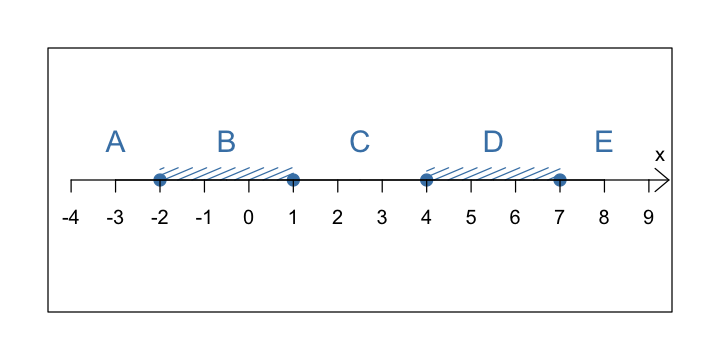

In [228]:
options(repr.plot.width=6,repr.plot.height=3)
par(mar=c(2,2,2,2))

plot(c(-2,1,4,7),c(0,0,0,0),col='steelblue',pch=20,cex=2,
     xaxt='n',yaxt='n',xlim=c(-4,9),ylim=c(-0.5,0.5))

polygon(c(-2,1,1,-2),c(0,0,0.05,0.05),
        col='steelblue',density=c(10),border=NA)
polygon(c(4,7,7,4),c(0,0,0.05,0.05),
        col='steelblue',density=c(10),border=NA)

axis(1,pos=0,at=-4:9)
axis(3,pos=0,tck=0,col.axis='steelblue',cex.axis=1.5,
     at=c(-3,-0.5,2.5,5.5,8),labels=c('A','B','C','D','E'))
text(9.25,0.1,"x")
arrows(9,0,9.45,0,angle=40,length=0.15)

<table style="width:95%;">
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">Python</th> 
    <th style="text-align:center;">R</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='python'>

x = float(input('x = '))
if x >= -2:
    if x <= 7:
        if x < 4:
             print('принадлежит')
        else:
             print('не принадлежит') 
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='r'>

x <- as.numeric(readline('x = '))
if (x >= -2) {
    if (x <= 7) {
        if (x < 4) {
             print('принадлежит')
        } else {
             print('не принадлежит') 
        }
    }
}    

    </code></pre></td>     
  </tr>    
</table>

In [231]:
# the wrong variant
x <- as.numeric(readline('x = '))
if (x >= -2) {
    if (x <= 7) {
        if (x < 4) {
             print('принадлежит')
        } else {
             print('не принадлежит') 
        }
    }
}

x = -3


1.

| Область | Условие 1 | Условие 2 | Условие 3 | Программа выведет | Область обрабатывается верно |
|-:|-:|-:|-:|-:|-:|
| Area | Condition 1 | Condition 2 | Condition 3 | Program Outputs | The Area Is Processed Correctly |
|   | `x  ≥ -2` | `x ≤ 7` | `x < 4` |  |  |
| A | Нет / no | - | - | - | Нет / no |
| B | Да / yes | Да / yes | Да / yes | не принадлежит / does not belong | Нет / no |
| C | Да / yes | Да / yes | Да / yes | не принадлежит/ does not belong | Да / yes |
| D | Да / yes | Да / yes | Нет / no | принадлежит/ belongs | Да / yes |
| E | Да / yes | Нет / no | - | - | Нет / no |

2.

In [233]:
# the right variant
x <- as.numeric(readline('x = '))
if (((x >= -2) & (x <= 1)) | ((x >= 4) & (x <= 7))) {
    print('принадлежит')
} else {
    print('не принадлежит')
}

x = -3
[1] "не принадлежит"


In [236]:
answer_dictionary[24] <- "
1.
| Область | Условие 1 | Условие 2 | Условие 3 | Программа выведет | Область обрабатывается верно |
|-:|-:|-:|-:|-:|-:|
| Area | Condition 1 | Condition 2 | Condition 3 | Program Outputs | The Area Is Processed Correctly |
|   | `x  ≥ -2` | `x ≤ 7` | `x < 4` |  |  |
| A | Нет / no | - | - | - | Нет / no |
| B | Да / yes | Да / yes | Да / yes | не принадлежит / does not belong | Нет / no |
| C | Да / yes | Да / yes | Да / yes | не принадлежит/ does not belong | Да / yes |
| D | Да / yes | Да / yes | Нет / no | принадлежит/ belongs | Да / yes |
| E | Да / yes | Нет / no | - | - | Нет / no |
2.
if (x >= -2) {
    if (x <= 7) {
        if (x < 4) {
⟹
if (((x >= -2) & (x <= 1)) | ((x >= 4) & (x <= 7))) {
"

## 25.
Дан целочисленный массив из 40 элементов. Элементы массива могут принимать произвольные значения. 

Опишите на русском языке или на одном из языков программирования алгоритм, 

который находит и выводит сумму элементов наибольшей возрастающей последовательности подряд идущих элементов массива.

Исходные данные объявлены так, как показано ниже. 

Запрещается использовать переменные, не описанные ниже, но разрешается не использовать часть из них.

- `Объявляем массив А из 40 элементов`.

- `Объявляем целочисленные переменные I, L, Lmax, S, Smax`.

- `В цикле от 1 до 40 вводим элементы массива А с 1-го по 40-й`.

- `...`

В качестве ответа вам необходимо привести фрагмент программы (или описание алгоритма на естественном языке), который должен находиться на месте многоточия. 

Вы можете записать решение также на другом языке программирования (укажите название и используемую версию языка программирования, например `Borland Pascal 7.0`) или в виде блок-схемы. 

В этом случае вы должны использовать те же самые исходные данные и переменные, какие были предложены в условии (например, в образце, записанном на естественном языке).

---

An integer array of 40 elements is given. Array elements can take arbitrary values. 

Describe in Russian or in one of the programming languages an algorithm 

that finds and displays the sum of the elements of the largest increasing sequence of consecutive array elements.

The original data is declared as shown below. 

It is forbidden to use variables not described below, but it is allowed not to use a part of them.

- `Declare an array A of 40 elements`.

- `Declare the integer variables I, L, Lmax, S, Smax`.

- `In the cycle from 1 to 40, we introduce the elements of array A from the 1st to the 40th`.

- `...`

As an answer, you need to bring the program fragment (or description of the algorithm in natural language), which should be in place of the ellipsis. 

You can also write the solution in another programming language (specify the name and the version of the programming language used, for example `Borland Pascal 7.0`) or as a flowchart. 

In this case, you must use the same source data and variables that were proposed in the condition (for example, in a sample written in the natural language).

<table style="width:95%;">
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">Python</th> 
    <th style="text-align:center;">R</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='python'>
    
N = 40
A = []

#use integer variables I, L, Lmax, S, Smax

for K in range(N):
    A.append(int(input()))       
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='r'>
    
N <- 40
A <- vector(length=N)
#use integer variables I, L, Lmax, S, Smax

for (K in 1:N){
    A[K] <- as.integer(readline())
...
}   
    </code></pre></td>     
  </tr>    
</table>

In [242]:
version <- R.version.string

In [241]:
N <- 40
A <- vector(length=N)
Lmax <- 0; Smax <- 0
L <- 0; S <- 0

for (I in 1:N) {
    A[I] <- as.integer(readline())
# The fragment instead of the ellipsis
    if  (I > 1) {
        if (A[I] > A[I-1]) {
            L <- L + 1
            S <- S + A[I]
            if (L == Lmax & S > Smax) {            
                Smax <- S
            } else if (L > Lmax) {
                Lmax <- L; Smax <- S
            }
        } else {
            L <- 1; S <- A[I]
        }
    }
}

print(Smax)    

-10
-20
-30
-40
-50
-40
-30
-20
-10
10
20
30
40
50
60
70
80
90
80
70
60
50
40
30
20
10
-10
-20
-30
-20
-10
10
20
30
40
50
60
70
80
90
[1] 300


In [243]:
program_fragment <- "
N <- 40
A <- vector(length=N)
Lmax <- 0; Smax <- 0
L <- 0; S <- 0

for (I in 1:N) {
    A[I] <- as.integer(readline())
# The fragment instead of the ellipsis
    if  (I > 1) {
        if (A[I] > A[I-1]) {
            L <- L + 1
            S <- S + A[I]
            if (L == Lmax & S > Smax) {            
                Smax <- S
            } else if (L > Lmax) {
                Lmax <- L; Smax <- S
            }
        } else {
            L <- 1; S <- A[I]
        }
    }
}

print(Smax)    
"

In [244]:
answer_dictionary[25] <- paste(version, program_fragment, sep=";")

## 26.

## 27.

## Ответы &nbsp; &nbsp; &nbsp; Answers

In [245]:
answer_dictionary

<hash> containing 25 key-value pair(s).
  1 : 3
  10 : 62
  11 : 15
  12 : FCDA
  13 : 400
  14 : 13
  15 : 41
  16 : 5, 13, 21
  17 : 1500
  18 : 14
  19 : 2
  2 : 34
  20 : 337
  21 : 199
  22 : 7
  23 : 97
  24 : 
1.
| Область | Условие 1 | Условие 2 | Условие 3 | Программа выведет | Область обрабатывается верно |
|-:|-:|-:|-:|-:|-:|
| Area | Condition 1 | Condition 2 | Condition 3 | Program Outputs | The Area Is Processed Correctly |
|   | `x  ≥ -2` | `x ≤ 7` | `x < 4` |  |  |
| A | Нет / no | - | - | - | Нет / no |
| B | Да / yes | Да / yes | Да / yes | не принадлежит / does not belong | Нет / no |
| C | Да / yes | Да / yes | Да / yes | не принадлежит/ does not belong | Да / yes |
| D | Да / yes | Да / yes | Нет / no | принадлежит/ belongs | Да / yes |
| E | Да / yes | Нет / no | - | - | Нет / no |
2.
if (x >= -2) {
    if (x <= 7) {
        if (x < 4) {
⟹
if (((x >= -2) & (x <= 1)) | ((x >= 4) & (x <= 7))) {
  25 : R version 3.5.0 (2018-04-23);
N <- 40
A <- vector(length=N)
Lmax 